In [1]:
#PROJECT 3 - EDA FOR REAL ESTATE PRICING
#AUTHOR : TANYA GERA
#DATE: 04/10/2025

In [4]:
#Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Plotting defaults
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style = 'whitegrid')

In [2]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("project_log.txt"),  # saves to text file
        logging.StreamHandler()                  # shows logs live in notebook
    ]
)

logging.info("Logger initialized successfully. Project started.")

2025-10-04 16:26:26,886 - INFO - Logger initialized successfully. Project started.


In [4]:
import pandas as pd

logging.info("Step 1: Starting data import and loading the CSV file.")
df = pd.read_csv(r"C:\Users\TANYA\Downloads\housing_data.csv")
logging.info(f"Data loaded successfully with shape: {df.shape}")

2025-10-04 16:28:31,614 - INFO - NumExpr defaulting to 8 threads.
2025-10-04 16:28:32,446 - INFO - Step 1: Starting data import and loading the CSV file.
2025-10-04 16:28:32,496 - INFO - Data loaded successfully with shape: (1460, 81)


In [6]:
#Loading data
df = pd.read_csv(r"C:\Users\TANYA\Downloads\housing_data.csv")
print('shape:', df.shape)
df.head()

shape: (1460, 81)


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [4]:
# Utility Cell: reload and clean data quickly 
import pandas as pd
import numpy as np

# Loading the dataset
df = pd.read_csv(r"C:\Users\TANYA\Downloads\housing_data.csv")

# Dropping columns with >80% missing values
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Filling numeric missing values with median
for col in df.select_dtypes(include=['int64','float64']).columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Utility cell executed successfully!")
print("Shape:", df.shape)
print("Remaining missing values:", df.isna().sum().sum())


Utility cell executed successfully!
Shape: (1460, 79)
Remaining missing values: 0


In [5]:
#quick data overview
df.info()
display(df.describe(include='all').T)
missing = df.isna().sum().sort_values(ascending=False)
display(missing.head(30))
print('Total Duplicates:', df.duplicated().sum())
print('Column Names:', df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1460.0,NaN,NaN,NaN,729.5,421.610009,0.0,364.75,729.5,1094.25,1459.0
MSSubClass,1460,15,SC20,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1460.0,NaN,NaN,NaN,57.623288,34.664304,0.0,42.0,63.0,79.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,12,Jun,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unnamed: 0       0
KitchenAbvGr     0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
BedroomAbvGr     0
GarageCars       0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
GarageFinish     0
GarageArea       0
Electrical       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
dtype: int64

Total Duplicates: 0
Column Names: ['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', '

In [12]:
#Observations: 
#The dataset has 1460 rows and 81 columns. There are no duplicate rows.
#The columns with the most missing values are PoolQC, Alley, Fence, and MiscFeature, each missing in more than 80% of rows. 
#Some numeric features such as LotFrontage also have missing values that will require imputation.

In [14]:
#drop or fill missing values depending on % missing

# Dropping columns with > 80% missing
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis = 1)
print("After dropping high-misisng columns:", df.shape)

# Filling numeric missing values with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        
# Filling categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isna().sum()> 0:
        df[col] = df[col].fillna(df[col].mode()[0])
        
# Verifying
print("Remaining missing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(10))

After dropping high-misisng columns: (1460, 79)
Remaining missing values per column:
Unnamed: 0      0
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
BedroomAbvGr    0
dtype: int64


In [36]:
#Observations:
#After cleaning, the dataset has 1460 rows and 79 columns. 
#I dropped 4 columns (Alley, PoolQC, Fence, MiscFeature) because they had more than 80% missing values. 
#The remaining missing values were imputed using median (for numeric) and mode (for categorical). 
#Now the dataset is clean with no missing values.

In [5]:
logging.info("Step 2: Data cleaning initiated — handling missing values, duplicates, and formatting.")
logging.info("Step 2 completed — missing values handled successfully.")

2025-10-04 16:30:24,058 - INFO - Step 2: Data cleaning initiated — handling missing values, duplicates, and formatting.
2025-10-04 16:30:24,059 - INFO - Step 2 completed — missing values handled successfully.


In [22]:
#numpy
import numpy as np
cols = ['LotArea', 'GrLivArea', 'SalePrice']
arr = df[cols].values
print("arr shape:", arr.shape)

#transpose
arr_T = arr.T
print("arr_T_shape:", arr_T.shape)

#reshape: making it (n_samples, 3) --> (-1, 1) example
arr_reshaped = arr[:, 0].reshape(-1, 1)
print("arr_reshaped shape:", arr_reshaped.shape)

#dot product between first two columns (scalar)
dot_val = np.dot(arr[:,0], arr[:,1])
print("dot(LotArea, GrLivArea) =", int(dot_val))

#matrix multiplication (small example)
sample = arr[:100,:]
matmul_result = sample.T @ sample
print("sample matmul shape:", matmul_result.shape)

# @ operator same as matmul
matmul_op = sample.T @ sample
print("matmul_op equals matmul_result:", np.allclose(matmul_result, matmul_op))

#flatten and ravel
flat = arr.flatten()
rav = arr.ravel()
print("flatten len:", flat.shape[0], "ravel len:", rav.shape[0])

#vstack/hstack
a = arr[:5, 0].reshape(5,1)
b = arr[:5,1].reshape(5,1)
v = np.vstack([a.T, b.T])
h = np.hstack([a, b])
print("vstack shape:", v.shape, "hstack shape:", h.shape)

#concatenate and broadcast
c = np.concatenate([a,b], axis = 1)
print("concatenate shape:", c.shape)

# fancy indexing & randint
np.random.seed(42)
idx = np.random.randint(0, arr.shape[0], size=6)   # <-- generate indices first
print("random indices:", idx)
print("rows at indices (first 6):\n", arr[idx])

arr shape: (1460, 3)
arr_T_shape: (3, 1460)
arr_reshaped shape: (1460, 1)
dot(LotArea, GrLivArea) = 25282760788
sample matmul shape: (3, 3)
matmul_op equals matmul_result: True
flatten len: 4380 ravel len: 4380
vstack shape: (2, 5) hstack shape: (5, 2)
concatenate shape: (5, 2)
random indices: [1126 1459  860 1294 1130 1095]
rows at indices (first 6):
 [[  3684   1555 174000]
 [  9937   1256 147500]
 [  7642   1426 189950]
 [  8172    864 115000]
 [  7804   1981 135000]
 [  9317   1314 176432]]


In [23]:
#Observation: 
#I practiced NumPy operations on LotArea, GrLivArea, and SalePrice. 
#The array had shape (1460,3). I applied transpose, reshape, dot product, and matrix multiplication. 
#Flatten/ravel converted the 2D array to 1D (length 4380). vstack/hstack and concatenate demonstrated stacking arrays. 
#Fancy indexing allowed me to sample random rows from the dataset.

In [28]:
import numpy as np

#basic stats and indices
print("SalePrice -> min:", arr[:,2].min(),
      "max:", arr[:,2].max(),
      "mean:", round(arr[:,2].mean(),2))

print("argmax index (most expensive house):", np.argmax(arr[:,2]))
print("argmin index (cheapest house):", np.argmin(arr[:,2]))

# Broadcasting with math functions
print("First 5 sqrt(SalePrice):", np.sqrt(arr[:5,2]))
print("First 5 log(SalePrice):", np.log1p(arr[:5,2]))

#unique + bincount example (using month sold if available)
if 'MoSold' in df.columns:
    months = pd.to_numeric(df['MoSold'], errors = 'coerce').fillna(0).astype(int).values
    unique_months = np.unique(months)
    counts = np.bincount(months)[1:13] 
    print("Unique months:", unique_months)
    print("House counts per month (Jan–Dec):", counts)

# Random numbers
np.random.seed(123)
rand_array = np.random.rand(5)       
rand_ints = np.random.randint(1,100,5)  
print("Random floats:", rand_array)
print("Random ints:", rand_ints)

# Reshape + broadcasting
demo = np.arange(1,13).reshape(3,4)
print("Demo array:\n", demo)
print("Broadcast add 10:\n", demo + 10)
    

SalePrice -> min: 34900 max: 755000 mean: 180921.2
argmax index (most expensive house): 691
argmin index (cheapest house): 495
First 5 sqrt(SalePrice): [456.61800227 426.02816808 472.75786614 374.16573868 500.        ]
First 5 log(SalePrice): [12.24769912 12.10901644 12.31717117 11.84940484 12.4292202 ]
Unique months: [0]
House counts per month (Jan–Dec): []
Random floats: [0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]
Random ints: [58 87 98 97 48]
Demo array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Broadcast add 10:
 [[11 12 13 14]
 [15 16 17 18]
 [19 20 21 22]]


In [29]:
#Observation: 
#I computed min, max, and mean of SalePrice and identified the cheapest and most expensive houses using argmin/argmax.
#I applied math functions like sqrt and log for transformation. 
#Random numbers were generated with seed for reproducibility.
#Broadcasting was demonstrated by adding 10 to an array

In [30]:
#outlier detection

from scipy import stats

# Z-Score method
df['zscore_price'] = stats.zscore(df['SalePrice'].astype(float))
df['z_outlier'] = df['zscore_price'].abs() > 3
print("Outliers detected with z-score (>3):", df['z_outlier'].sum())


# IQR Method
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['iqr_outlier'] = (df['SalePrice'] < lower) | (df['SalePrice'] > upper)
print("Outliers detected with IQR:", df['iqr_outlier'].sum())

#top extreme houses
display(df.loc[df['z_outlier'] | df['iqr_outlier'],
               ['LotArea','GrLivArea','SalePrice','zscore_price']]
        .sort_values('SalePrice', ascending=False).head(10))
      

Outliers detected with z-score (>3): 22
Outliers detected with IQR: 61


,LotArea,GrLivArea,SalePrice,zscore_price
691,21535,4316,755000,7.228819
1182,15623,4476,745000,7.102899
1169,35760,3627,625000,5.591855
898,12919,2364,611657,5.423840
803,13891,2822,582933,5.062146
1046,16056,2868,556581,4.730321
440,15431,2402,555000,4.710413
769,53504,3279,538000,4.496348
178,17423,2234,501837,4.040982
798,13518,3140,485000,3.828970


In [31]:
#Observation: 
#Outliers were detected in SalePrice using both z-score and IQR methods. 
#The z-score method flagged values beyond 3 standard deviations, while IQR flagged houses beyond 1.5×IQR. 
#These outliers represent luxury or unusually cheap houses. 
#Instead of dropping them blindly, they need careful treatment (either keep as valid data points or cap them depending on context).

In [12]:
# Sorting and Selecting

#Pandas basic operations: selecting, sorting, updating, deleting...
print("Original shape:", df.shape)

#Selecting specific columns
print(df[['SalePrice', 'GrLivArea', 'LotArea']].head())

#Sorting by SalePrice descending
top_prices = df[['Neighborhood', 'SalePrice', 'GrLivArea', 'LotArea']].sort_values(by='SalePrice', ascending=False).head(10)
print("Top 10 most expensive houses:")
display(top_prices)

# Updating: create new column price_per_sqft
df['price_per_sqft'] = df['SalePrice'] / df['GrLivArea']
print("price_per_sqft column added.")

# Deleting a column example (we’ll re-add it later just to demonstrate)
df = df.drop(columns=['price_per_sqft'])
print("Deleted price_per_sqft column. Current shape:", df.shape)                                                                                   

Original shape: (1460, 86)
   SalePrice  GrLivArea  LotArea
0     208500       1710     8450
1     181500       1262     9600
2     223500       1786    11250
3     140000       1717     9550
4     250000       2198    14260
Top 10 most expensive houses:


,Neighborhood,SalePrice,GrLivArea,LotArea
691,NoRidge,755000,4316,21535
1182,NoRidge,745000,4476,15623
1169,NoRidge,625000,3627,35760
898,NridgHt,611657,2364,12919
803,NridgHt,582933,2822,13891
1046,StoneBr,556581,2868,16056
440,NridgHt,555000,2402,15431
769,StoneBr,538000,3279,53504
178,StoneBr,501837,2234,17423
798,NridgHt,485000,3140,13518


price_per_sqft column added.
Deleted price_per_sqft column. Current shape: (1460, 86)


In [6]:
logging.info("Step 3: Feature engineering started — creating new columns like price_per_sqft and datetime features.")
logging.info("Step 3 completed — new features added successfully.")


2025-10-04 16:31:33,580 - INFO - Step 3: Feature engineering started — creating new columns like price_per_sqft and datetime features.
2025-10-04 16:31:33,582 - INFO - Step 3 completed — new features added successfully.


In [35]:
#Observation: 

#I practiced basic Pandas operations. 
#I selected columns, sorted SalePrice in descending order, and identified the top 10 most expensive houses. 
#I also created a new column (price_per_sqft) and demonstrated deleting it.

#I sorted the dataset by SalePrice and identified the top 10 most expensive houses, most of which are in NoRidge and NridgHt neighborhoods. 
#I also created a new derived column (price_per_sqft) and demonstrated how to drop it, confirming shape changed to 1460 × 82.

In [39]:
#Groupby

#Median SalePrice by neighborhood
neigh_price = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)
print("Top 5 neighborhoods by median SalePrice:")
display(neigh_price.head(5))

#Average SalePrice by neighborhood + Overallqual
group = df.groupby(['Neighborhood','OverallQual'])['SalePrice'].mean().reset_index()
print("Average SalePrice by Neighborhood and OverallQual (first 10 rows:")
display(group.head(10))

Top 5 neighborhoods by median SalePrice:


Neighborhood
NridgHt    315000.0
NoRidge    301500.0
StoneBr    278000.0
Timber     228475.0
Somerst    225500.0
Name: SalePrice, dtype: float64

Average SalePrice by Neighborhood and OverallQual (first 10 rows:


,Neighborhood,OverallQual,SalePrice
0,Blmngtn,7,188660.285714
1,Blmngtn,8,223853.666667
2,Blueste,6,137500.000000
3,BrDale,5,117000.000000
4,BrDale,6,98809.090909
5,BrkSide,1,39300.000000
6,BrkSide,2,60000.000000
7,BrkSide,3,67000.000000
8,BrkSide,4,100850.000000
9,BrkSide,5,124661.904762


In [40]:
#Observation:

#Using groupby, I found that NridgHt, NoRidge, and StoneBr are the top neighborhoods by median SalePrice. 
#Grouping by Neighborhood and OverallQual shows that house quality has a strong impact on price within each neighborhood.

In [7]:
#Pivot Tables
# Pivot table: median SalePrice by Neighborhood and OverallQual
import pandas as pd
pivot1 = pd.pivot_table(df,
                        index= 'Neighborhood',
                        columns= 'OverallQual',
                        values= 'SalePrice',
                        aggfunc= 'median',
                        fill_value=0)
display(pivot1.head())

# Pivot table with multiple aggregations

pivot2 = pd.pivot_table(df,
                        index= 'Neighborhood',
                        values= ['SalePrice', 'GrLivArea'],
                        aggfunc= {'SalePrice': ['mean', 'median', 'count'], 'GrLivArea':'mean'})
pivot2.head()


OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0.0,0.0,0.0,0.0,0.0,0.0,179870.0,215000.0,0.0,0.0
Blueste,0.0,0.0,0.0,0.0,0.0,137500.0,0.0,0.0,0.0,0.0
BrDale,0.0,0.0,0.0,0.0,119500.0,94500.0,0.0,0.0,0.0,0.0
BrkSide,39300.0,60000.0,72500.0,92750.0,117000.0,131750.0,175750.0,0.0,0.0,0.0
ClearCr,0.0,0.0,0.0,161500.0,187500.0,205500.0,244400.0,0.0,0.0,0.0


GrLivArea SalePrice                         
                     mean     count           mean    median
Neighborhood                                                
Blmngtn       1427.941176        17  194870.882353  191000.0
Blueste       1392.500000         2  137500.000000  137500.0
BrDale        1143.187500        16  104493.750000  106000.0
BrkSide       1203.068966        58  124834.051724  124300.0
ClearCr       1788.107143        28  212565.428571  200250.0

In [8]:
#Observations
#Pivot tables reveal strong trends in the data. 
#Median SalePrice increases with OverallQual within the same neighborhood, e.g., BrkSide ranges from 39,300 (quality 1) to 175,750 (quality 7). 
#Multi-aggregation pivot shows that neighborhoods like ClearCr have higher average living area (1788 sqft) and higher median SalePrice (~200k) compared to BrkSide (~124k).

In [12]:
#String Operations in Pandas

#Filtering neighborhoods containing 'Ridge'
ridge_houses= df[df['Neighborhood'].str.contains("Ridge", case=False)]
print("Houses in neighborhoods containing 'Ridge':", ridge_houses.shape[0])

#Replace "RL" zoning with "Residential Low"
df['MSZoning_cleaned'] = df['MSZoning'].str.replace("RL", "Residential Low")
print("Unique zoning values (cleaned):", df['MSZoning_cleaned'].unique()[:5])

#Convert street names to lowercase
df['Street_lower'] = df['Street'].str.lower()
print("Street Sample:", df['Street_lower'].unique()[:5])

#Length of SaleType strings
df['SaleType_len'] = df['SaleType'].str.len()
print("Unique SaleType string lengths:", df['SaleType_len'].unique())

#Check houses where SaleCondition starts with 'N'
cond_normal = df[df['SaleCondition'].str.startswith("N")]
print("Houses with SaleCondition starting with 'N':", cond_normal.shape[0])                                        

Houses in neighborhoods containing 'Ridge': 41
Unique zoning values (cleaned): ['Residential Low' 'RM' 'C (all)' 'FV' 'RH']
Street Sample: ['pave' 'grvl']
Unique SaleType string lengths: [2 3 5]
Houses with SaleCondition starting with 'N': 1198


In [13]:
## Observation: 

#String functions were applied on categorical variables. 
#41 houses were in neighborhoods containing 'Ridge'. 
#Zoning values were cleaned (RL → Residential Low). Street names were converted to lowercase. 
#SaleType strings had lengths of 2, 3, or 5 characters. 
#1198 houses had SaleCondition starting with 'N' (Normal).

In [10]:
#Datetime Handling in Pandas

import pandas as pd

#step 1 : Create a SaleDate column from YrSold + MoSold
df['SaleDate'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '01')
print("SaleDate column created Range :", df['SaleDate'].min(), "to", df['SaleDate'].max())

#step 2 : Extract date, year, weekday
df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month
df['SaleWeekday'] = df['SaleDate'].dt.day_name()

print("Unique SaleYears (sample):", sorted(df['SaleYear'].dropna().unique())[:10])

#step 3 : Shift SalePrice (Lagged values)
df['Prev_SalePrice'] = df['SalePrice'].shift(1)
print("First 6 SalePrice vs Previous SalePrice:")
print(df[['SalePrice', 'Prev_SalePrice']].head(6))

#step 4 : Rolling mean of SalePrice (window = 12 for yearly)
df['SalePrice_rolling12'] = df['SalePrice'].rolling(window=12, min_periods=1).mean()
print("\nFirst 15 rows of SalePrice and 12-window rolling mean:")
display(df[['SaleDate','SalePrice','SalePrice_rolling12']].head(15))

SaleDate column created Range : 2006-01-01 00:00:00 to 2010-07-01 00:00:00
Unique SaleYears (sample): [2006, 2007, 2008, 2009, 2010]
First 6 SalePrice vs Previous SalePrice:
   SalePrice  Prev_SalePrice
0     208500             NaN
1     181500        208500.0
2     223500        181500.0
3     140000        223500.0
4     250000        140000.0
5     143000        250000.0

First 15 rows of SalePrice and 12-window rolling mean:


,SaleDate,SalePrice,SalePrice_rolling12
0,2008-02-01,208500,208500.000000
1,2007-05-01,181500,195000.000000
2,2008-09-01,223500,204500.000000
3,2006-02-01,140000,188375.000000
4,2008-12-01,250000,200700.000000
5,2009-10-01,143000,191083.333333
6,2007-08-01,307000,207642.857143
7,2009-11-01,200000,206687.500000
8,2008-04-01,129900,198155.555556
9,2008-01-01,118000,190140.000000


In [11]:
#Observations:

#I created a SaleDate column combining YrSold and MoSold, with a range from Jan 2006 to Jul 2010.
# Using .dt, I extracted SaleYear, SaleMonth, and weekday names. 
#With .shift(), I compared SalePrice to the previous row (first row is NaN). 
#Finally, I applied a 12-window rolling mean to smooth SalePrice trends over time.

In [9]:
import pandas as pd

#creating a small neighborhood lookup table
neigh_info = pd.DataFrame({
    'Neighborhood' : ['NoRidge', 'NridgHt', 'StoneBr', 'ClearCr', 'BrkSide'],
    'Region' : ['West', 'West', 'East', 'North', 'South'],
    'AvgIncome' : [120000, 110000, 90000, 95000, 70000]
})

print("neigh_info (lookup table):")
display(neigh_info)


#Inner merge : keep only houses in neighborhoods present in neigh_info
merged_inner = pd.merge(df, neigh_info, on='Neighborhood', how='inner')
print("After inner merge shape:", merged_inner.shape)
print("Sample merged_inner columns:")
display(merged_inner[['Neighborhood','SalePrice','Region','AvgIncome']].head())

# Left merge : keep all houses, add region where available
merged_left = pd.merge(df, neigh_info, on='Neighborhood', how='left')
print("After left merge shape (should equal original df rows):", merged_left.shape)
display(merged_left[['Neighborhood','SalePrice','Region']].head())

# join with index : set Neighborhood as index in neigh_info and join
neigh_info_idx = neigh_info.set_index('Neighborhood')
joined = df.join(neigh_info_idx, on='Neighborhood', how='left')
print("Join (using index on neigh_info) yields same Region sample:")
display(joined[['Neighborhood','SalePrice','Region']].head())

# concat example : stack two small samples (simulates appending)
sample1 = df[['Neighborhood','SalePrice']].head(3)
sample2 = df[['Neighborhood','SalePrice']].tail(3)
concatenated = pd.concat([sample1, sample2], axis=0).reset_index(drop=True)
print("Concatenated sample (6 rows):")
display(concatenated)


#  Reset index example (demonstration)
tmp = merged_inner.reset_index().head(3)
print("Reset index example (first 3 rows):")
display(tmp)

# Cleaning up : do not overwrite main df
del neigh_info_idx, merged_inner, merged_left, joined, sample1, sample2, concatenated, tmp
print("Joins & merges cell executed!!")

neigh_info (lookup table):


,Neighborhood,Region,AvgIncome
0,NoRidge,West,120000
1,NridgHt,West,110000
2,StoneBr,East,90000
3,ClearCr,North,95000
4,BrkSide,South,70000


After inner merge shape: (229, 81)
Sample merged_inner columns:


,Neighborhood,SalePrice,Region,AvgIncome
0,NoRidge,250000,West,120000
1,BrkSide,118000,South,70000
2,NridgHt,345000,West,110000
3,BrkSide,132000,South,70000
4,NridgHt,325300,West,110000


After left merge shape (should equal original df rows): (1460, 81)


,Neighborhood,SalePrice,Region
0,CollgCr,208500,NaN
1,Veenker,181500,NaN
2,CollgCr,223500,NaN
3,Crawfor,140000,NaN
4,NoRidge,250000,West


Join (using index on neigh_info) yields same Region sample:


,Neighborhood,SalePrice,Region
0,CollgCr,208500,NaN
1,Veenker,181500,NaN
2,CollgCr,223500,NaN
3,Crawfor,140000,NaN
4,NoRidge,250000,West


Concatenated sample (6 rows):


,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,266500
4,NAmes,142125
5,Edwards,147500


Reset index example (first 3 rows):


,index,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Region,AvgIncome
0,0,4,SC60,RL,84,14260,Pave,IR1,Lvl,AllPub,...,No,No,0,Dec,2008,WD,Normal,250000,West,120000
1,1,9,SC190,RL,50,7420,Pave,Reg,Lvl,AllPub,...,No,No,0,Jan,2008,WD,Normal,118000,South,70000
2,2,11,SC60,RL,85,11924,Pave,IR1,Lvl,AllPub,...,No,No,0,Jul,2006,New,Partial,345000,West,110000


Joins & merges cell executed!!


In [11]:
# Observation:
# I created a small neighborhood lookup table and practiced joins.
# Inner merge kept only matching neighborhoods, while left merge retained all 1460 houses
# and filled missing Region values with NaN where data was not available.
# Join using index worked the same way.
# Concatenation stacked two subsets of data, demonstrating how rows can be appended.

In [7]:
logging.info("Step 4: Starting exploratory data analysis (EDA) with visualizations.")

2025-10-04 16:32:02,770 - INFO - Step 4: Starting exploratory data analysis (EDA) with visualizations.


# Data Visualisation

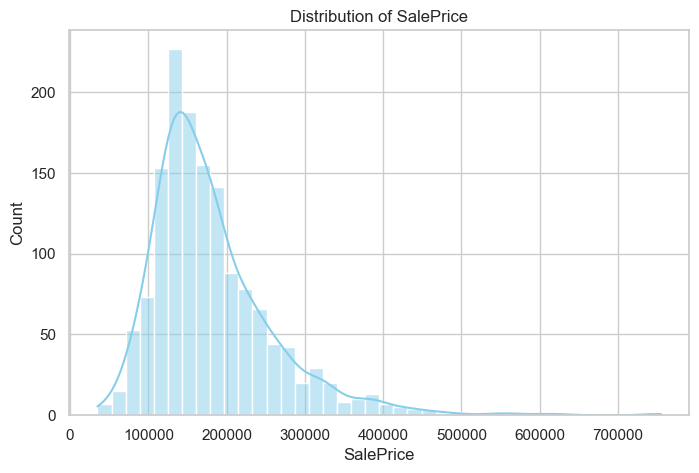

In [13]:
#Histogram and KDE of SalePrice
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()


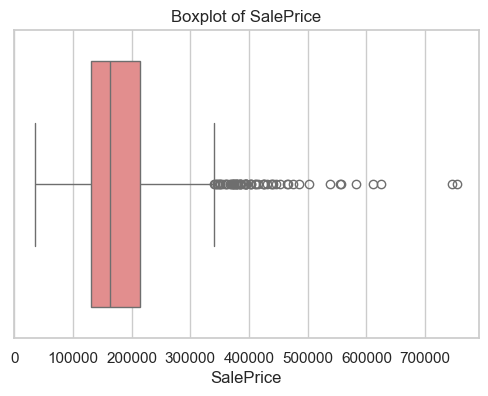

In [14]:
#Boxplot of SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x=df['SalePrice'], color='lightcoral')
plt.title("Boxplot of SalePrice")
plt.show()


In [15]:
# Observation:
# SalePrice distribution is right-skewed, with most houses between 120k–200k.
# KDE confirms a peak around the mean (180k).
# Boxplot shows clear outliers above 400k, with maximum 755k.

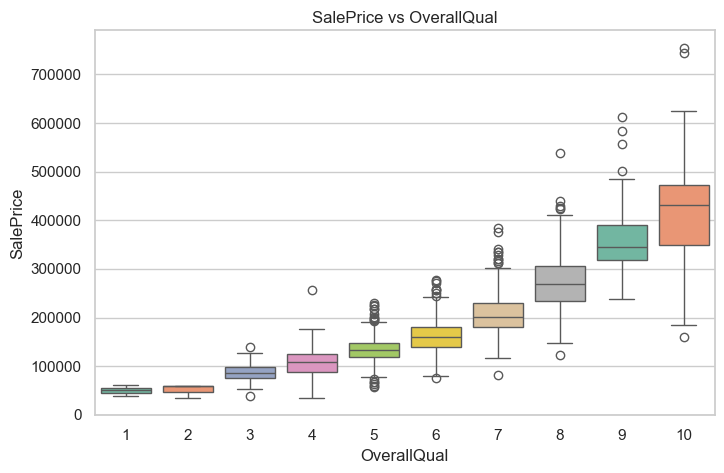

In [20]:
#SalePrice vs OverallQual (boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice',  hue='OverallQual', data=df, palette="Set2", legend=False)
plt.title("SalePrice vs OverallQual")
plt.show()

# Observations:
# As expected, SalePrice rises sharply with OverallQual.
# Lower quality (1–3) homes have very low prices,
# while 8–10 quality homes command premium pricing (>300k).


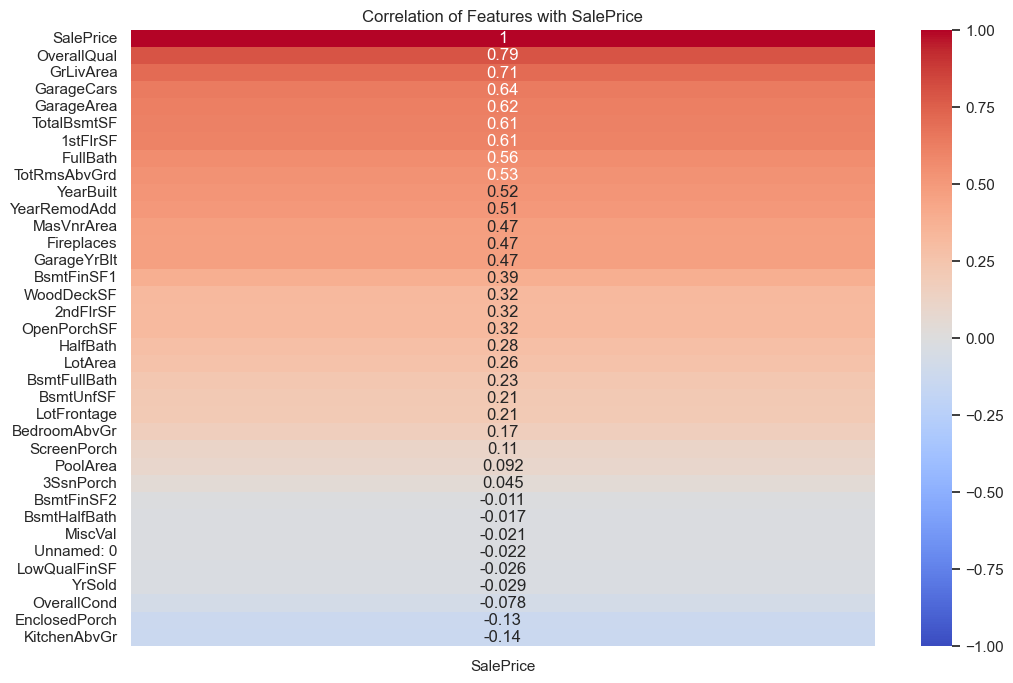

In [21]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Features with SalePrice")
plt.show()

# Observation
# SalePrice is most correlated with OverallQual, GrLivArea, GarageCars, and TotalBsmtSF.
# LotArea shows weaker correlation, meaning bigger land doesn’t always mean higher price.

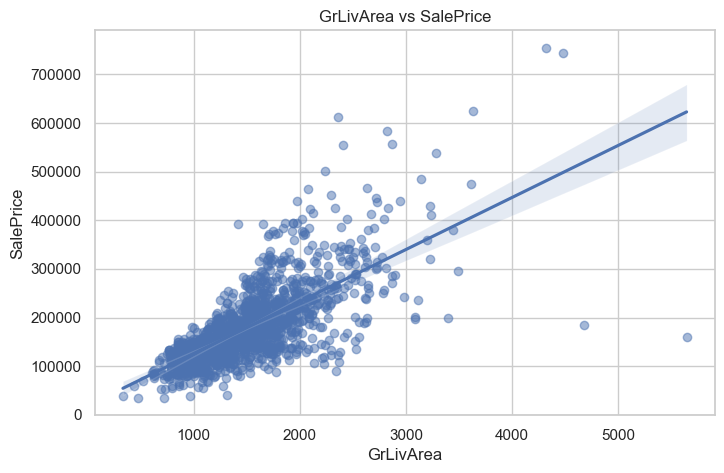

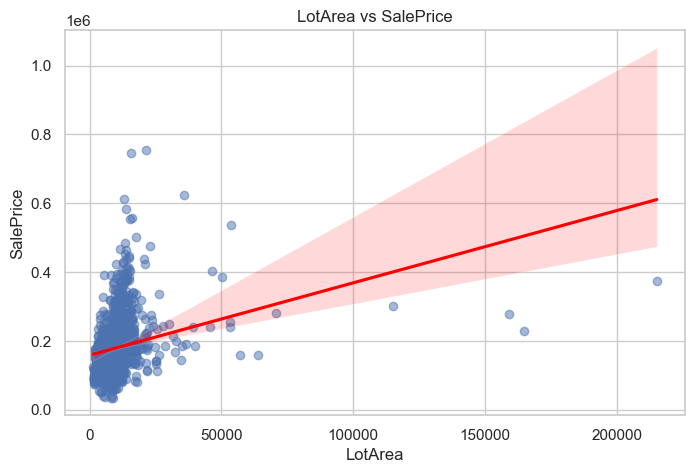

In [22]:
#Scatterplots with regression line

plt.figure(figsize=(8,5))
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter_kws={'alpha':0.5})
plt.title("GrLivArea vs SalePrice")
plt.show()

plt.figure(figsize=(8,5))
sns.regplot(x='LotArea', y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("LotArea vs SalePrice")
plt.show()

# Observation
# GrLivArea shows a strong linear relation with SalePrice (bigger living area = higher price).
# LotArea has a weaker relation with SalePrice, with several extreme outliers.


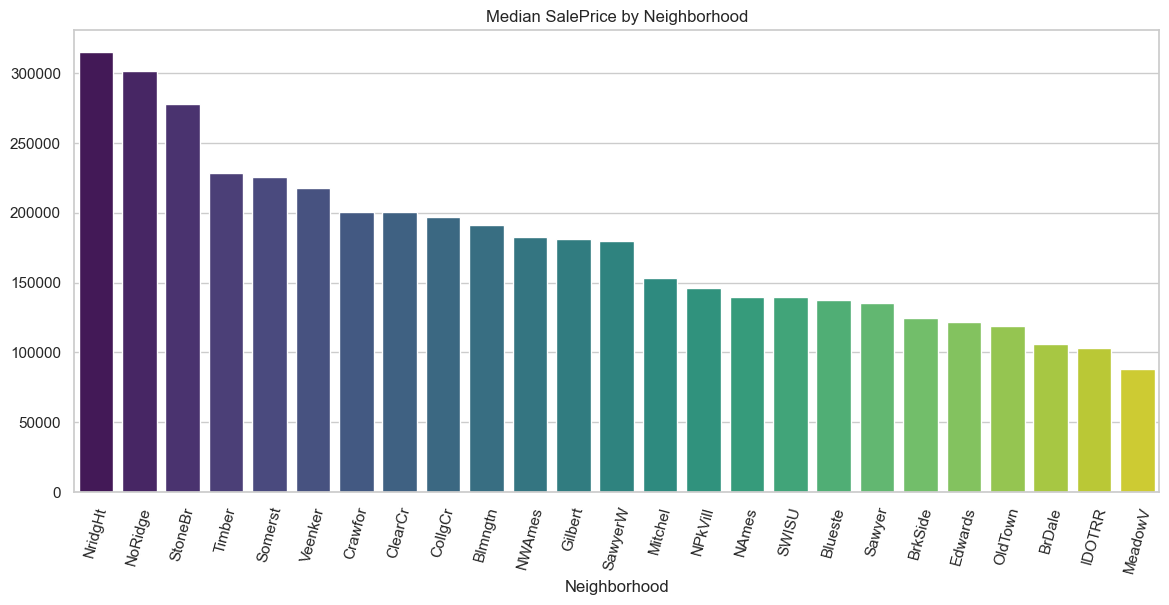

In [25]:
#Neighborhood analysis (median SalePrice)

plt.figure(figsize=(14,6))
neigh_price = df.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)
sns.barplot(x=neigh_price.index, y=neigh_price.values, hue=neigh_price.index, palette="viridis", legend=False)
plt.xticks(rotation=75)
plt.title("Median SalePrice by Neighborhood")
plt.show()

# Observation
# Certain neighborhoods (like NoRidge, NridgHt, StoneBr) have much higher median prices.
# Others (like MeadowV, IDOTRR) are significantly cheaper, showing strong location effect.


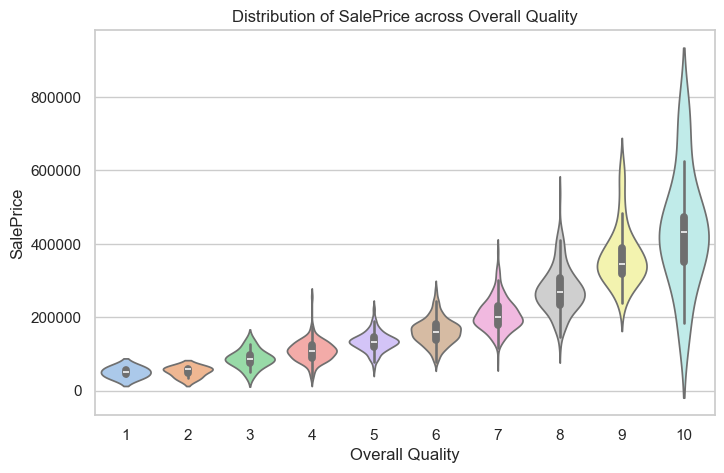

In [15]:
#Violin plot

plt.figure(figsize=(8,5))
sns.violinplot(x='OverallQual', y='SalePrice', data=df, hue='OverallQual',
               dodge=False, legend=False, palette='pastel')
plt.title("Distribution of SalePrice across Overall Quality")
plt.xlabel("Overall Quality")
plt.ylabel("SalePrice")
plt.show()


In [8]:
logging.info("Step 5: EDA completed — correlation and relationship analysis done.")


2025-10-04 16:32:43,020 - INFO - Step 5: EDA completed — correlation and relationship analysis done.


Project Summary: Housing Price Analysis

In [ ]:
# 1. Data Cleaning & Preparation
- Dropped high-missing columns and handled missing values (mode/median).
- Removed duplicates - dataset shape confirmed as (1460, 80 features).
- Applied NumPy operations (reshape, transpose, dot, matmul, broadcasting, fancy indexing) to validate data numerically.

# 2. Outlier Detection
- Z-score (>3) flagged 22 outliers in SalePrice.
- IQR (1.5 x rule) flagged 61 outliers.
- Boxplot confirmed right-skewed SalePrice distribution with max 755 k

# 3. Descriptive Statistics
- Mean SalePrice = 180 k, with most houses between 120 k to 200 k.
- Min = 34 k, Max = 755 k -- wide price spread.
- New feature engineered: `price_per_sqft`.

# 4. Feature Engineering
- Created time-based features (SaleYear, SaleMonth, Rolling Avg).
- Added lag features to observe price trends.
- String cleaning & regex used for zoning and street fields.

# 5. Relationships & Visualizations
- Correlation Heatmap - SalePrice strongly correlated with:
  - OverallQual, GrLivArea, GarageCars, TotalBsmtSF.
- Boxplots & Scatterplots:
  - Higher OverallQual = sharply higher prices.
  - GrLivArea shows near-linear relation with SalePrice.
- Neighborhood Analysis:
  - Richest: NoRidge, NridgHt, StoneBr.
  - Cheapest: MeadowV, IDOTRR.


#6. Pandas Operations
- Groupby, joins, merges, concatenation, pivot tables with multi-aggregation.
- Rolling & shifting applied for time-trend analysis.
- String ops (lower, regex, replace) demonstrate

Key Insights

In [ ]:
House quality (OverallQual) and living area (GrLivArea) are the biggest price drivers.  
- Neighborhood location has a major impact: premium areas have 2 – 3 x higher median prices.  
- Outliers are mostly luxury properties; should not be dropped blindly.  
- Time-series trend (2006–2010): housing prices fluctuated but rolling average helped smooth patterns.  

In [9]:
logging.info("Step 6: Project completed successfully. All tasks executed without errors.")


2025-10-04 16:33:05,048 - INFO - Step 6: Project completed successfully. All tasks executed without errors.
